In [1]:
import torch
import random
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:



x_train_simple = []
y_train_simple = []

a = []


def read_matrix(l):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\best_version\\X_train\\file_matrix{l}.txt') as f:
        for i in range(20):
            for j in range(5):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22


for i in range(1, 65537):
    a.append(read_matrix(i))
    if i % 6555 == 0:
        print(i//655, '%')

b = torch.tensor(a)

x_train = b


10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [5]:
x_train.size()

torch.Size([65536, 20, 20])

In [6]:
def read_phases(l):

    phases2 = []
    with open(f'D:\\my_pyhton_projects\\nn_sarov\\best_version\\Y_train\\delta{l}.txt') as f:
        phases = f.readline().replace('[', '').replace(']','').replace('\n', '').replace(',', '').split()
        
    for i in range(4):
        phases2.append(float(phases[i]))
        
    return phases2

a2 = []

for i in range(1, 65537):
    a2.append(read_phases(i))
    if i % 6555 == 0:
        print(i//655, '%')


b2 = torch.tensor(a2)


y_train = b2



10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %


In [7]:
y_train.size()

torch.Size([65536, 4])

In [6]:
#ансквизим выборки

In [7]:
# x_train = x_train.unsqueeze(1).float()

In [8]:
len(x_train)


65536

In [215]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, padding=1)
        #self.dropout = nn.Dropout(p=0.1)  # dropout-регуляризация
        self.fc1 = nn.Linear(in_features=400, out_features=240)
        self.fc2 = nn.Linear(in_features=240, out_features=100)
        self.fc3 = nn.Linear(in_features=100, out_features=20)
        self.fc4 = nn.Linear(in_features=20, out_features=4)
        self.Tanh = nn.Tanh()
        self.Sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.Tanh(x)
        x = self.conv2(x)
        x = self.Tanh(x)
        x = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        #x = self.dropout(x)  # dropout-регуляризация
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.Sigmoid(x)
        x = self.fc2(x)
        x = self.Sigmoid(x)
        x = self.fc3(x)
        x = self.Sigmoid(x)
        x = self.fc4(x)
        return x
    
    
lenet5 = LeNet5()

In [216]:
X_train = x_train.unsqueeze(1).float()

In [217]:
X_train.shape

torch.Size([65536, 1, 20, 20])

In [218]:
#loss = torch.nn.MSELoss()
loss = torch.nn.L1Loss()
#loss = torch.nn.HuberLoss(reduction='mean', delta=1.0)

In [219]:
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-2)
#optimizer = optim.SGD(lenet5.parameters(), lr=0.001, momentum=0.9)
batch_size = 5000
losses = []
num_epoch = 50

for epoch in range(num_epoch):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        preds = lenet5.forward(X_batch)
        
        loss_value = loss(preds, y_batch) 
        #loss_value = loss_value.mean()
        loss_value.backward()
        
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epoch, loss_value))
    losses.append(loss_value)
    
    
    
        
    

Epoch [1/50], Loss: 0.9629
Epoch [2/50], Loss: 0.8679
Epoch [3/50], Loss: 0.8001
Epoch [4/50], Loss: 0.7188
Epoch [5/50], Loss: 0.6892
Epoch [6/50], Loss: 0.6915
Epoch [7/50], Loss: 0.6863
Epoch [8/50], Loss: 0.6621
Epoch [9/50], Loss: 0.6669
Epoch [10/50], Loss: 0.6225
Epoch [11/50], Loss: 0.6721
Epoch [12/50], Loss: 0.6563
Epoch [13/50], Loss: 0.6744
Epoch [14/50], Loss: 0.6507
Epoch [15/50], Loss: 0.6598
Epoch [16/50], Loss: 0.6378
Epoch [17/50], Loss: 0.6605
Epoch [18/50], Loss: 0.6733
Epoch [19/50], Loss: 0.6623
Epoch [20/50], Loss: 0.6818
Epoch [21/50], Loss: 0.6608
Epoch [22/50], Loss: 0.6810
Epoch [23/50], Loss: 0.6395
Epoch [24/50], Loss: 0.6616
Epoch [25/50], Loss: 0.6456
Epoch [26/50], Loss: 0.6507
Epoch [27/50], Loss: 0.6262
Epoch [28/50], Loss: 0.6617
Epoch [29/50], Loss: 0.6607
Epoch [30/50], Loss: 0.6512
Epoch [31/50], Loss: 0.6461
Epoch [32/50], Loss: 0.6474
Epoch [33/50], Loss: 0.6370
Epoch [34/50], Loss: 0.6376
Epoch [35/50], Loss: 0.6477
Epoch [36/50], Loss: 0.6685
E

In [186]:
def predict(lenet5, x):
    y_pred = lenet5.forward(x)

    return y_pred

In [187]:
import matplotlib.pyplot as plt

In [188]:
losses = [losses[i].detach().numpy() for i in range(num_epoch)]

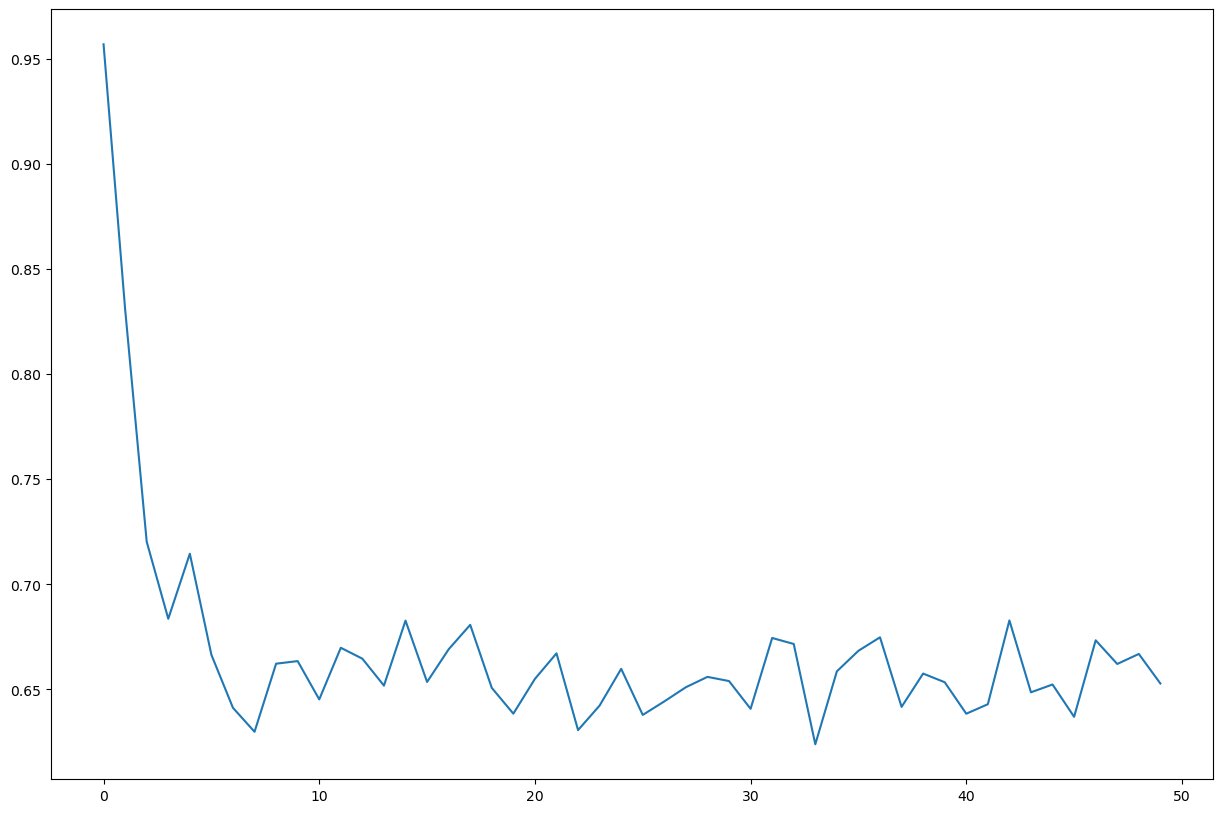

In [189]:
epochs = [i for i in range(num_epoch)]
plt.figure(figsize=(15, 10))
plt.plot(epochs, losses)
plt.show()

In [154]:
# предскажем fi = [[0, 0, 0, 0], [1, 2, 3, 4], [1, 2, 1, 4], [1, 2, 2, 5], [0, 2, 0, 4], [1, 1, 1, 1]]

In [155]:
def read_matrix_hui(l):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\X_validation\\file_matrix{l}.txt') as f:
        for i in range(10):
            for j in range(3):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22
x_valid = torch.Tensor(read_matrix_hui(1)) #параметр считывания настроим вручную
x_valid

tensor([[1.7894e+12, 6.7466e+08, 2.5723e+12, 1.2132e+13, 9.6540e+10, 2.7605e+13,
         1.2631e+13, 1.4015e+09, 7.3011e+10, 2.0199e+12],
        [1.4557e+11, 5.5045e+07, 3.3704e+11, 2.0937e+12, 1.8043e+10, 5.1593e+12,
         2.1799e+12, 1.8364e+08, 5.9569e+09, 1.6432e+11],
        [3.2495e+11, 3.4240e+08, 3.3678e+12, 2.1439e+13, 1.7986e+11, 5.1431e+13,
         2.2321e+13, 1.8349e+09, 3.7054e+10, 3.6681e+11],
        [4.9336e+11, 2.3683e+09, 2.1082e+13, 1.2108e+14, 9.6325e+11, 2.7544e+14,
         1.2606e+14, 1.1487e+10, 2.5630e+11, 5.5691e+11],
        [6.7931e+12, 2.3413e+10, 1.8250e+14, 9.8026e+14, 7.5582e+12, 2.1612e+15,
         1.0206e+15, 9.9435e+10, 2.5338e+12, 7.6680e+12],
        [1.8713e+12, 6.4496e+09, 5.0272e+13, 2.7003e+14, 2.0820e+12, 5.9534e+14,
         2.8115e+14, 2.7391e+10, 6.9797e+11, 2.1123e+12],
        [4.3974e+11, 2.1109e+09, 1.8791e+13, 1.0792e+14, 8.5856e+11, 2.4550e+14,
         1.1236e+14, 1.0238e+10, 2.2844e+11, 4.9638e+11],
        [1.3083e+12, 1.3785

In [156]:
x_valid.shape

torch.Size([10, 10])

In [158]:
x_valid = x_valid.unsqueeze(0).float() #применить 2 раза

In [159]:
x_valid.shape

torch.Size([1, 1, 10, 10])

In [160]:
pred_hui = predict(lenet5, x_valid)
pred_hui

tensor([[ 1.5154,  0.5634, -0.4463, -1.4315]], grad_fn=<AddmmBackward0>)

In [161]:
#Вывод итогового результата

In [29]:
import numpy as np
import matplotlib.pylab as plt
from math import pi, exp
import random
import torch

lmbda = 0.5e-6 # длина волны
k = 2*pi/lmbda # Волновое число
z = 4 # Расстояние от XY до UV (Тогда u, v береv в диапазоне [-0.01, 0.01]), чтобы диапазон углов был в [-5, 5]
m = k/z
E0 = 1

# Разобъём дальнюю зону на точки, в которых считаем интенсивность
x = np.linspace(-0.0009, 0.0009, 20)
y = np.linspace(-0.0009, 0.0009, 20)

In [163]:
fi1 = [1, 2, 3, 4]
fi2 = pred_hui.detach()[0].numpy() 
fi = [i + k for i, k in zip(fi2, fi1)]

print('fi1 = ', fi1, 'начальное задание фаз которые мы как будто не знаем в реальном эксперименте')
print('fi2 = ', fi2, 'генерация сдвигов фаз нейросетью')
print('fi = ', fi, 'итоговые фазы для построения')




fi1 =  [1, 2, 3, 4] начальное задание фаз которые мы как будто не знаем в реальном эксперименте
fi2 =  [ 1.5153517   0.5634371  -0.44632152 -1.4315232 ] генерация сдвигов фаз нейросетью
fi =  [2.51535165309906, 2.5634371042251587, 2.55367848277092, 2.5684767961502075] итоговые фазы для построения


In [164]:
# данный алгос строит распределение по fi

# Длина стороны
a = 0.003
y20 = 1.05 * a
x2 = -1.05 * a
y10 = 0.05 * a
x1 = -0.05 * a
y2 = y20
y1 = y10
zss = 0
# xss, yss = 0.001, 0.001 
xss, yss = np.meshgrid(x, y, sparse=True)
n = 0
for i in range(2):
    for j in range(2):
        Exy = E0*(np.cos(fi[n]) + 1j*np.sin(fi[n]))
        zss += (Exy*(np.cos(k*(xss**2 +yss**2)/(2*z)) + np.sin(k*(xss*2 + yss**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xss*yss))) * (np.cos((x2*xss + y2*yss)*m) - 1j*np.sin((x2*xss + y2*yss)*m) - 
                             np.cos((x1*xss + y2*yss)*m) + 1j*np.sin((x1*xss + y2*yss)*m) -
                             np.cos((x2*xss + y1*yss)*m) + 1j*np.sin((x2*xss + y1*yss)*m) + 
                             np.cos((x1*xss + y1*yss)*m) - 1j*np.sin((x1*xss + y1*yss)*m)))
        n += 1 # Для каждой субаппертуры берем значение из списка fi
        y2 -= 1.1*a
        y1 -= 1.1*a
    x2 += 1.1*a 
    x1 += 1.1*a  
    y2 = y20
    y1 = y10
E = abs(zss)**2   

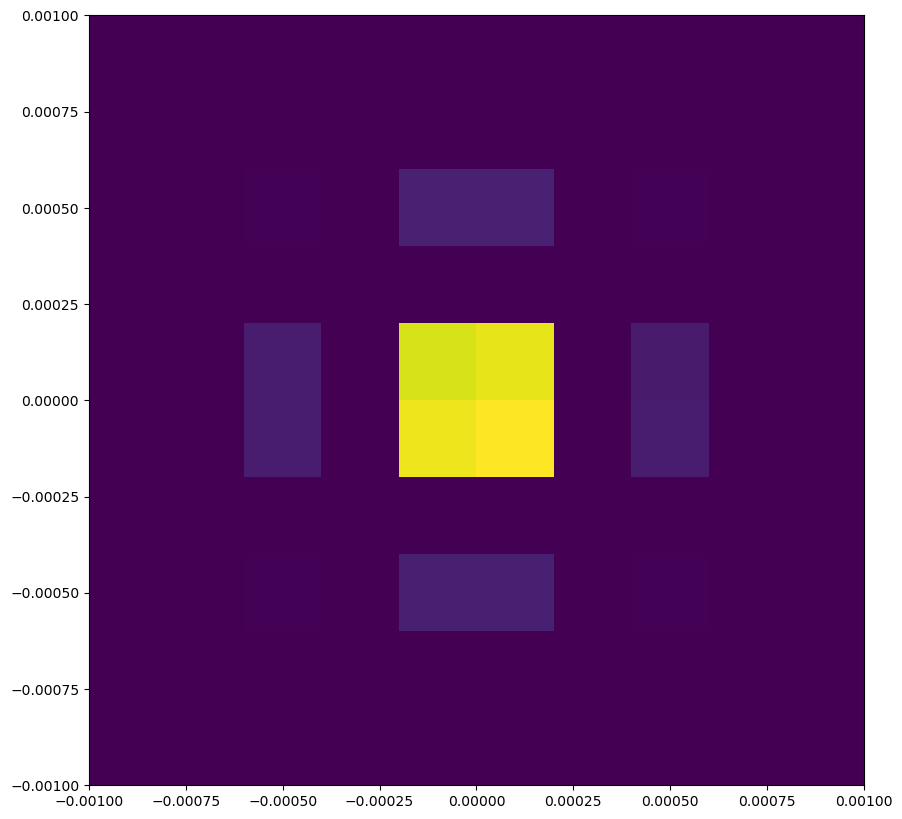

In [165]:
# вывод графика
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(xss, yss, E, cmap=plt.get_cmap('viridis'))
plt.show()

In [166]:
# так же выведем изначальное распределение


In [167]:
fi = fi1

In [168]:
# Длина стороны
a = 0.003
y20 = 1.05 * a
x2 = -1.05 * a
y10 = 0.05 * a
x1 = -0.05 * a
y2 = y20
y1 = y10
zss = 0
# xss, yss = 0.001, 0.001 
xss, yss = np.meshgrid(x, y, sparse=True)
n = 0
for i in range(2):
    for j in range(2):
        Exy = E0*(np.cos(fi[n]) + 1j*np.sin(fi[n]))
        zss += (Exy*(np.cos(k*(xss**2 +yss**2)/(2*z)) + np.sin(k*(xss*2 + yss**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xss*yss))) * (np.cos((x2*xss + y2*yss)*m) - 1j*np.sin((x2*xss + y2*yss)*m) - 
                             np.cos((x1*xss + y2*yss)*m) + 1j*np.sin((x1*xss + y2*yss)*m) -
                             np.cos((x2*xss + y1*yss)*m) + 1j*np.sin((x2*xss + y1*yss)*m) + 
                             np.cos((x1*xss + y1*yss)*m) - 1j*np.sin((x1*xss + y1*yss)*m)))
        n += 1 # Для каждой субаппертуры берем значение из списка fi
        y2 -= 1.1*a
        y1 -= 1.1*a
    x2 += 1.1*a 
    x1 += 1.1*a  
    y2 = y20
    y1 = y10
E = abs(zss)**2  

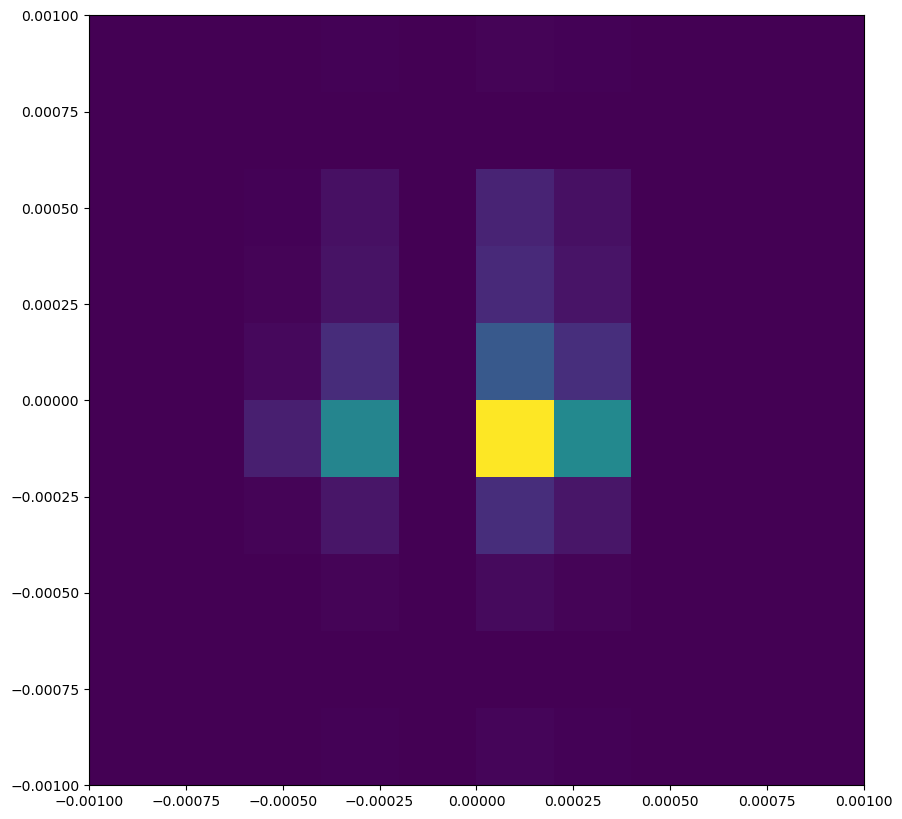

In [169]:
# вывод графика
fig, ax = plt.subplots(figsize=(10,10))
ax.pcolormesh(xss, yss, E, cmap=plt.get_cmap('viridis'))
plt.show()

In [30]:
def I_0(fi, zss = 0, a=0.003):
    for i in range(4):
        zss += E0/(1j*lmbda*z) * (a**2) * (np.cos(fi[i]) + 1j*np.sin(fi[i]))
    E = abs(zss)**2 
    return E

In [148]:
def read_matrix_10000(s):
    matrix22 = []
    input_matrix = []

    with open(f'D:\\my_pyhton_projects\\nn_sarov\\best_version\\X_validation\\matrix{s}.txt') as f:
        for i in range(20):
            for j in range(5):
                input_matrix += map(float, f.readline().replace('[', '').replace(']','').replace('\n', '').split())
            matrix22.append(input_matrix)
            input_matrix = []
    return matrix22

a4 = []
for i in range(1, 10001):
    a4.append(read_matrix_10000(i))
    if i % 1000 == 0:
        print(i//100, '%')

b4 = torch.tensor(a4)


X_V = b4

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [33]:
X_V.shape

torch.Size([10000, 20, 20])

In [34]:
def read_phases_10000(s):

    phases2 = []
    with open(f'D:\\my_pyhton_projects\\nn_sarov\\best_version\\Y_validation\\phases{s}.txt') as f:
        phases = f.readline().replace('[', '').replace(']','').replace('\n', '').replace(',', '').split()
        
    for i in range(4):
        phases2.append(float(phases[i]))
        
    return phases2

a5 = []

for i in range(1, 10001):
    a5.append(read_phases_10000(i))
    if i % 1000 == 0:
        print(i//100, '%')


b5 = torch.tensor(a5)

Y_V = b5



10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [35]:
Y_V.size()

torch.Size([10000, 4])

In [190]:
deltas  = []



In [152]:
X_V = X_V.unsqueeze(1).float() #применить 2 раза



In [191]:
X_V[1].shape

torch.Size([1, 1, 20, 20])

In [192]:
for i in range(10000):
    a = predict(lenet5, X_V[i]).detach()
    b = a.numpy()
    deltas.append(b)
    
    
                  

    

In [193]:
len(deltas)

10000

In [194]:
Initial_phases = []

In [195]:
for i in range(10000):
    a = Y_V[i].detach()
    b = a.numpy()
    Initial_phases.append(b)

In [196]:
len(Initial_phases)

10000

In [197]:
def I_0(fi, zss = 0, a=0.003):
    for i in range(4):
        zss += E0/(1j*lmbda*z) * (a**2) * (np.cos(fi[i]) + 1j*np.sin(fi[i]))
    E = abs(zss)**2 
    return E

In [198]:
I_max = I_0([0, 0, 0, 0])

In [199]:
I_max

324.0

In [200]:
Initial_Strel = []



In [201]:
for i in Initial_phases:
    Initial_Strel.append(round(I_0(i)/I_max, 2))
    


In [202]:
Initial_Strel[0]

0.78

In [203]:
cnt = 0
for i in Initial_Strel:
    if i >= 0.7:
        cnt +=1
        
cnt

549

In [204]:
Final_Strel = []
Final_phases = []

In [205]:
Final_phases = [i + k for i,k in zip(Initial_phases, deltas)]

In [206]:
Final_phases[1][0]

array([0.82444406, 0.50384617, 0.28482848, 0.73317003], dtype=float32)

In [207]:
for i in Final_phases:
    i = i[0]
    Final_Strel.append(round(I_0(i)/I_max, 2))
    
s = 0
for i in Final_Strel:
    if i >= 0.7:
        s +=1
        


In [208]:
len(Final_Strel)

10000

In [209]:
s

5092

<BarContainer object of 10 artists>

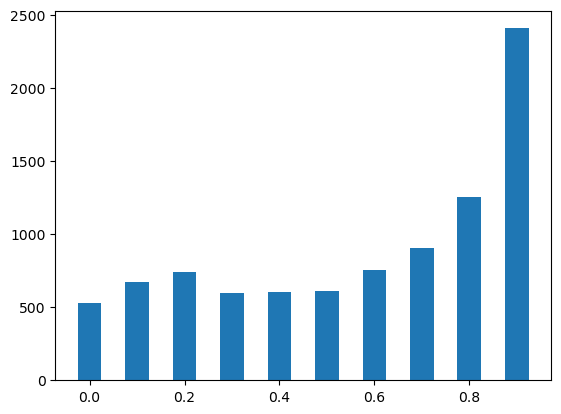

In [210]:
S = []
I = np.arange(10)/10

for i in range(10):
    i = i / 10
    
    s = 0
    for k in Final_Strel:
        if  ( i < k < 0.1+i)  :
            s +=1
            
    S.append(s)
    #print(i, i+0.1, s)
plt.bar(I, S, width = 0.05)
            
    
    

In [211]:
S

[526, 675, 744, 595, 601, 609, 752, 903, 1257, 2409]

<BarContainer object of 10 artists>

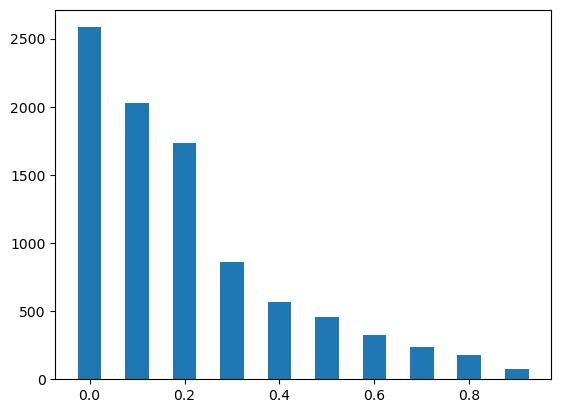

In [212]:
S = []
I = np.arange(10)/10

for i in range(10):
    i = i / 10
    
    s = 0
    for k in Initial_Strel:
        if  ( i < k < 0.1+i)  :
            s +=1
            
    S.append(s)
    #print(i, i+0.1, s)
    
plt.bar(I, S, width = 0.05)

In [213]:
S

[2583, 2027, 1737, 863, 567, 460, 325, 234, 176, 78]

In [214]:
# подсчет количества улучшенных результатов
cnt = 0
for i, k in zip(Initial_Strel, Final_Strel):
    if i < k:
        cnt+=1
cnt
    

9566